In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants 
from scipy.optimize import curve_fit
#### PLOT THE DATA #######
SMALL_SIZE = 13.5
MEDIUM_SIZE = 17
BIGGER_SIZE = 23
plt.rcParams["font.family"] = "serif"
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)   # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [5]:
from ion_properties import lead,calcium,xenon,xenon2nd


Also plot dp/p

<>:44: SyntaxWarning: invalid escape sequence '\e'
<>:44: SyntaxWarning: invalid escape sequence '\e'
/tmp/pkruyt/ipykernel_14651/1199172790.py:44: SyntaxWarning: invalid escape sequence '\e'
  ax1.set_ylabel('Normalised emittance $\epsilon_x$ [rad m]')


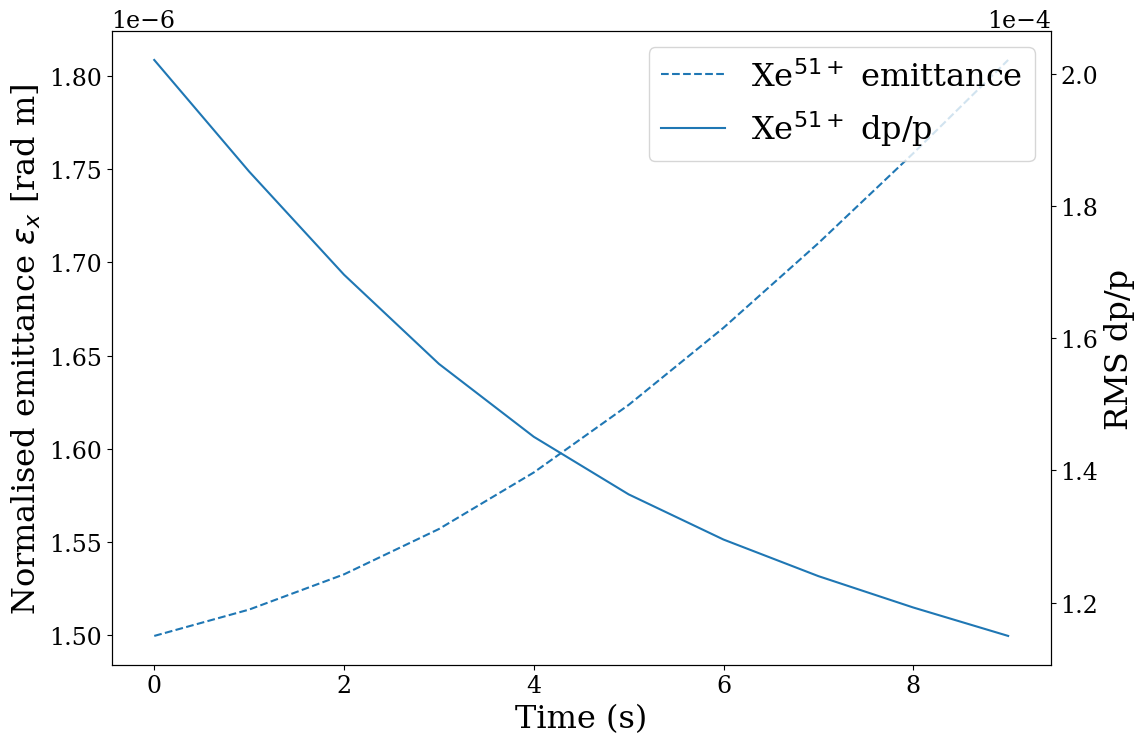

In [6]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})

# Create a second y-axis
ax2 = ax1.twinx()

# Lists to store handles and labels
handles = []
labels = []

for ion_loop in [xenon]:
    loaded_data = np.load(f'results/longitudinal/{ion_loop.name}.npz')

    delta = loaded_data['delta']
    zeta = loaded_data['zeta']
    state = loaded_data['state']
    x = loaded_data['x'] 
    time = loaded_data['time']
    s_per_turn = loaded_data['s_per_turn']
    px = loaded_data['px']
    action_x = loaded_data['action_x']
    action_y = loaded_data['action_y']
    emittance_x = loaded_data['emittance_x']
    rms_dp_p = np.std(delta, axis=1)
    
    window_size=10
    smoothed_rms_dp_p = np.convolve(rms_dp_p, np.ones(window_size)/window_size, mode='valid')

    # Plot on ax1 and collect handles and labels
    line1, = ax1.plot(time, emittance_x, linestyle='--', label=f'{ion_loop.name} emittance')
    handles.append(line1)
    labels.append(f'{ion_loop.name} emittance')
    
    # Plot on ax2 and collect handles and labels
    # line2, = ax2.plot(time[:len(smoothed_rms_dp_p)], smoothed_rms_dp_p, label=f'{ion_loop.name} dp/p')
    line2, = ax2.plot(time, rms_dp_p, label=f'{ion_loop.name} dp/p')
    handles.append(line2)
    labels.append(f'{ion_loop.name} dp/p')

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Normalised emittance $\epsilon_x$ [rad m]')
ax2.set_ylabel('RMS dp/p')
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Combine handles and labels from both axes into a single legend
plt.legend(handles, labels, loc='upper right')

plt.tight_layout()
plt.savefig('figures/Lead_longitudinal_cooling.png', dpi=300)
plt.show()
